#**Images Classification**

In this notebook, the loaded images would be for Skates, Shoes and Roller blades.
The purpose is to build a model using fastai.vision that can distinguish between those three objects.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
#importing fastai.vision
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
#moving to the directory where the data will be loaded
%cd /root/.fastai/data

/root/.fastai/data


Download the data from github on you local machine.

In [4]:
#Uploading data
from google.colab import files
uploaded = files.upload()

Saving SkatesShoesRollerblades.tgz to SkatesShoesRollerblades.tgz


In [5]:
#Untarring data
!tar xvzf SkatesShoesRollerblades.tgz

SkatesShoesRollerblades/
SkatesShoesRollerblades/train/
SkatesShoesRollerblades/train/Rollerblades/
SkatesShoesRollerblades/train/Rollerblades/image (1).png
SkatesShoesRollerblades/train/Rollerblades/image (10).png
SkatesShoesRollerblades/train/Rollerblades/image (11).png
SkatesShoesRollerblades/train/Rollerblades/image (12).png
SkatesShoesRollerblades/train/Rollerblades/image (13).png
SkatesShoesRollerblades/train/Rollerblades/image (14).png
SkatesShoesRollerblades/train/Rollerblades/image (15).png
SkatesShoesRollerblades/train/Rollerblades/image (16).png
SkatesShoesRollerblades/train/Rollerblades/image (17).png
SkatesShoesRollerblades/train/Rollerblades/image (18).png
SkatesShoesRollerblades/train/Rollerblades/image (19).png
SkatesShoesRollerblades/train/Rollerblades/image (2).png
SkatesShoesRollerblades/train/Rollerblades/image (20).png
SkatesShoesRollerblades/train/Rollerblades/image (21).png
SkatesShoesRollerblades/train/Rollerblades/image (22).png
SkatesShoesRollerblades/train/Ro

In [6]:
#Checking directory of untarred data
!ls

SkatesShoesRollerblades  SkatesShoesRollerblades.tgz


In [7]:
#Changing directory to the path which will be used
%cd SkatesShoesRollerblades
!ls

/root/.fastai/data/SkatesShoesRollerblades
train  valid


In [8]:
#Converting the path from string into PosixPath
from pathlib import Path
path = Path('/root/.fastai/data/SkatesShoesRollerblades')
path

PosixPath('/root/.fastai/data/SkatesShoesRollerblades')

In [0]:
#Loading data and normalizing it according to the pretrained data 'ImagnetNet
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224).normalize(imagenet_stats)

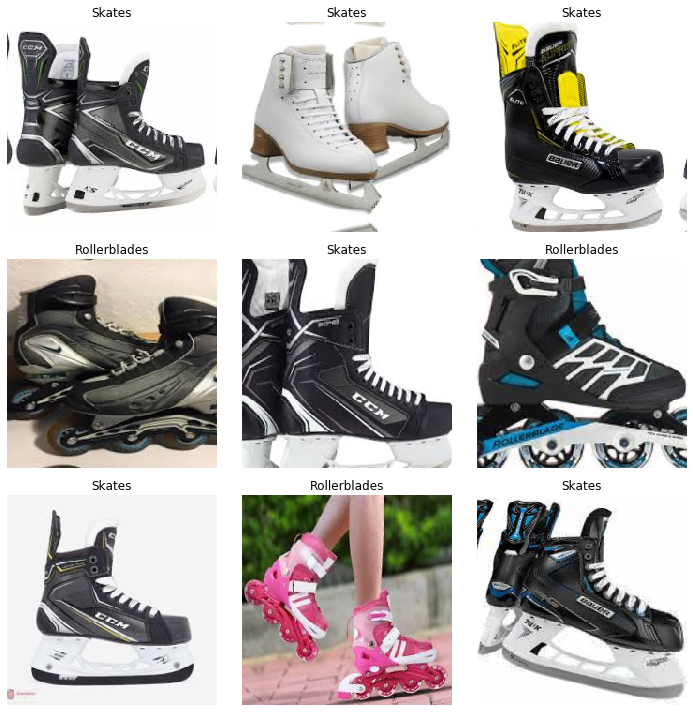

In [10]:
#taking a look on data
data.show_batch(rows=3, figsize=(10,10))

In [0]:
#importing pre-trained model resnet34
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [12]:
#fitting model
learn.fit_one_cycle(15)

epoch,train_loss,valid_loss,error_rate,time
0,2.098637,2.172389,0.428571,00:01
1,1.962427,1.375708,0.428571,00:01
2,1.826123,0.589170,0.214286,00:01
3,1.504122,0.314540,0.107143,00:01
4,1.241650,0.410784,0.107143,00:01
5,1.051075,0.497584,0.107143,00:01
6,0.901503,0.565546,0.107143,00:01
7,0.783781,0.616565,0.107143,00:01
8,0.691669,0.655322,0.107143,00:01
9,0.616894,0.681560,0.107143,00:01


In [13]:
#Interpreting what confuses our model the most
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()

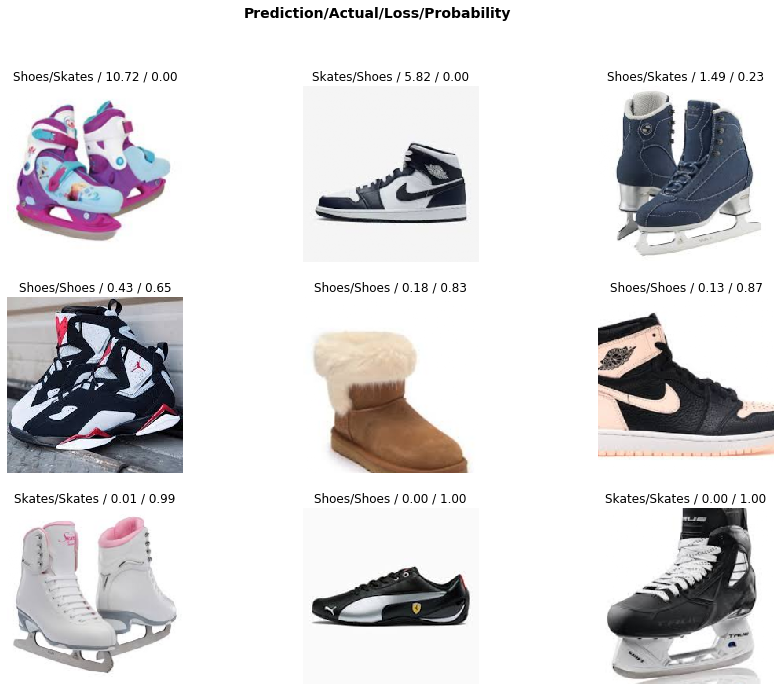

In [14]:
#Looking at the first row, it seems that the Skates get confused with the Shoes
interp.plot_top_losses(9, figsize=(15, 11))

In [15]:
interp.most_confused(min_val=2)

[('Skates', 'Shoes', 2)]